# Projeto 2 - NLP

-----

Nome:  Johnny Hideki Horita <br>
Turma: 780

Os segundo projeto do módulo de Machine Learning será focado no processamento de linguagem natural! Usaremos os algoritmos aprendidos e as técnicas vistas na segunda parte do curso para extrairmos informações relevantes de texto. Mais precisamente, de publicações no Twitter.

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos serão disponilizados para o desenvolvimento dos modelos, um para treino/validação e outro para submissão. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## O Problema

Você deverá desenvolver um modelo para detectar o sentimento de uma publicação do Twitter a classificando em uma das três categorias: **positiva**, **negativa** ou **neutra**. O texto da publicação está disponível na coluna "tweet_text". Teste pelo menos 3 técnicas de NLP diferentes e escolha a métrica de avaliação que julgar mais pertinente.  

Escolha o melhor modelo e gere uma base a partir dos dados de submissão, que estão no caminho ```Dados/subm/Subm3Classes.csv```, com o seguinte formato:


|id|sentiment_predict
|-|-|
|12123232|0
|323212|1
|342235|2

Salve essa tabela como um arquivo csv com o nome ```<nome>_<sobrenome>_nlp_degree.csv``` e submeta-o como parte da entrega final do projeto.  

Para ajudar no desenvolvimento, é possível dividir o projeto em algumas fases:

- **Análise de consistência dos dados**: analise se os dados estão fazendo sentido, se os campos estão completos e se há dados duplicados ou faltantes. Se julgar necessário, trate-os.    


- **Análise exploratória**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pré-processamento e transformações**: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações, como o Bag Of Words e o TF-IDF.    


- **Treinamento do modelo**: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados na primeira parte do módulo. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch.    


- **Conclusões**: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!     



## Critérios de avaliação

Os seguintes itens serão avaliados:

1. Desenvolvimento das etapas descritas acima;


2. Reprodutibilidade do código: seu código será executado e precisa gerar os mesmos resultados apresentados por você;


3. Clareza: seu código precisa ser claro e deve existir uma linha de raciocínio direta. Comente o código em pontos que julgar necessário para o entendimento total;


4. Justificativa das conclusões obitdas: não existirá certo ou errado, mas as decisões e as conclusões precisam ser bem justificadas com base nos resultados obtidos.  

O desempenho do modelo **não** será considerado como critério de avaliação.  

## Informações gerais

- O projeto deve ser desenvolvido individualmente;


- Data de divulgação: 11/01/2022;


- Aula de monitoria: 19/01/2022;


- Data de entrega: 26/01/2022;


- Entrega através do Class: Árvore de Decisão -> Exercícios -> Projeto 2


Anexar, na entrega, o notebook de desenvolvimento e o arquivo .csv de submissão, da seguinte forma:  

notebook: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2.ipynb```   
csv: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2_submissao.csv```


## Dicas

### Base de treino e submissão

A base de submissão não possui a variável de saída, portanto ela será utilizada **apenas** para gerar o arquivo que acompanha a submissão do projeto.      

### Tente encontrar possíveis vieses

É muito comum que modelos de NLP possuam fortes vieses, como a tendência de relacionar palavras específicas com alguma classe de saída. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclusões. o campo "query_used" pode ser útil para essa análise.  

### O pré-processamento é a chave para um bom desempenho

Essa é a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja fácil de aplicar o mesmo processamento para uma nova base, você terá que fazer isso para gerar a base de submissão.

### Um termômetro para o seu desenvolvimento

Após a correção do seu projeto, o professor irá disponibilizar a sua acurácia obtida na base de submissão. Você pode interpretar esse resultado como a simulação do resultado do seu modelo em produção. Uma diferença entre o resultado do estudo e o resultado de submissão indica um grau de **overfitting** no seu modelo.

-------

# Desenvolvimento do projeto

## 1. Análise de consistência dos dados

### Importando bibliotecas

In [1]:
%%time

# Bibliotecas
import os
import re
import string
import random
import time

import pandas as pd
import numpy as np
import datetime
import requests
import warnings
from collections import Counter
from pprint import pprint

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
import plotly.offline as py
import plotly_express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, doc2vec

# Logistic Regression
from sklearn.linear_model import LogisticRegression 
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# Naive Bayes (Gaussian, Multinomial,BernoulliNB)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
# KNN (k-nearest neighbor)
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# XGBoost Classifier
from xgboost import XGBClassifier
# LGBM Classifier
from lightgbm import LGBMClassifier
# Ada Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
# Dummy Boosting Classifier
from sklearn.dummy import DummyClassifier
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# RidgeClassifier
from sklearn.linear_model import RidgeClassifier

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from unidecode import unidecode

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#!pip install enelvo
from enelvo.normaliser import Normaliser

# Abaixo seguem 2 formas para a instalação do spaCy: via conda ou pip
# Instalação utilizando conda
#!conda install -c conda-forge spacy

# Instalação utilizando Pip
#!pip install -U pip setuptools wheel
#!pip install -U spacy

import spacy
from spacy.util import compounding
from spacy.util import minibatch

from tqdm import tqdm

import shap

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from IPython.core.display import HTML as Center
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

print('Bibliotecas carregadas com sucesso.')

Bibliotecas carregadas com sucesso.
Wall time: 14.9 s


### Padrões

In [2]:
# Definição de padrões para gráficos e cores

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

colors = sns.color_palette("pastel") # deep, pastel, Set1 Set2 Set3, icefire, tab10, muted, colorlind, coolwarm
cmap_colors = 'GnBu'

font_path = "./fonts/CabinSketch-Bold.ttf"

In [3]:
# Definição de padrões para centralização de gráficos no notebook

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

### Funções

In [4]:
# Função de avaliação dos valores de NaN no dataframe

def missing_values_table(df):
    '''
    Função para verificar se existem valores nulos no dataframe
    Entrada:
        df - dataframe;
        
    Resultado: 
        Apresentação dos valores nulos no dataframe.

    '''
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Valores faltantes', 1 : '% de Valores Totais'})
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] != 0].sort_values(
    '% de Valores Totais', ascending=False).round(1)
    print ("O dataframe tem " + str(df.shape[1]) + " colunas e " + str(df.shape[0]) + " linhas.\n"      
        "Existem " + str(mz_table.shape[0]) +
          " colunas que têm valores faltantes.")
    mz_table.to_excel('missing_and_zero_values.xlsx', freeze_panes=(1,0), index = True)
    return mz_table


In [5]:
# Função de avaliação de modelos apresentação da matriz de confusão
score = []

def test_models(model_list, col_model_name, col_model, tec_model, X_train, X_test, y_train, y_test):
    '''
    Função para avaliação de modelos de predição
    Entrada:
        model_list - lista de modelos;
        col_model_name - label da lista de modelos, contendo o nome do modelo;
        col_model - label da lista de modelos, contendo a instancia do modelo de predição;
        tec_model - definição de tratamento de modelos;
        X_train - classe de treino
        X_test - classe de teste
        y_train - classe de treino
        y_test - classe de teste
        
    Resultado: 
        Apresentação de métricas de predição de modelos.

    '''
    for mdl in model_list:
        start = time.time()

        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        
        print("")        
        print("=" * 55)
        print("Model      : %s" % mdl[col_model_name])
        print("Accuracy   : %0.4f " % accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("MAE        : %0.4f " % mean_absolute_error(y_test, y_predict))
        print("RMSE       : %0.4f " % np.sqrt(mean_squared_error(y_test, y_predict)))
        print("R2         : %0.4f " % r2_score(y_test, y_predict))
        print("")
        print(classification_report(y_test, y_predict))

        global score
        score.append([mdl[col_model_name], tec_model, accuracy_score(y_test, y_predict)])
        
        cm = confusion_matrix(y_test, y_predict)
        labels = ['Negativo','Positivo','Neutro']
        dsp = ConfusionMatrixDisplay(cm, display_labels=labels)
        dsp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
        plt.grid(False)
        plt.show()        
        
        end = time.time()
        elptime = end - start
        converted_time = str(datetime.timedelta(seconds=elptime))
        print(f'Partial time: {converted_time}')
                

In [6]:
# Função para calcular a importância da variável no modelo

rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, predictors, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    # Adequando as classes para treino
    alg.fit(dtrain[predictors], dtrain[target])
    
    # Previsão de saída para o conjunto de dados de teste
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    # Utilizando o Cross Validation
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='accuracy')
    
    #Exibindo relatório:
    print (f"\nRelatório do Modelo {alg}")
    print ("\nAcuracia : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predictions))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


In [7]:

def read_corpus(list_sentences, tokens_only=False):
    if tokens_only:
        # For test data, just return sentences
        return list_sentences
    else:
        # For training data, add tags
        lista = []
        for i, line in enumerate(list_sentences):
            lista.append(doc2vec.TaggedDocument(line, [i]))

        return lista
    

In [8]:
# Função para contagem de palavras 

def words_unique(sentiment, numwords, raw_words):
    '''
    Função para contagem de palavras 
    Entrada:
        segmento - Categoria do segmento (ex. 2 = 'Neutro');
        numwords - quantas palavras específicas se pretende ver no resultado final; 
        raw_words - lista do texto;
        
    Resultado: 
        dataframe com informação sobre a palavra específica e quantas vezes aparece no texto (por ordem decrescente com base nas suas contagens).

    '''
    allother = []
    for item in dfc[dfc.sentiment != sentiment]['list_words']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in dfc[dfc.sentiment == sentiment]['list_words']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words


In [9]:
# Abaixo seguem 2 formas para a instalação do spaCy: via conda ou pip

# Instalação utilizando conda
#!conda install -c conda-forge spacy

# Instalação utilizando Pip
#!pip install -U pip setuptools wheel
#!pip install -U spacy

# Bilbioteca em portugues
# Efficiency
#!python -m spacy download pt_core_news_sm

# Accuracy
#!python -m spacy download pt_core_news_lg

spc_pt = spacy.load('pt_core_news_lg')
nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('portuguese')
#Adicionando stopwords que não estão na lista do nltk 
stopwords.append("'")
stopwords.append("pra")
stopwords.append("tá")
stopwords.append("tão")


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [10]:
# Função para tratamento da variável de texto para definir melhores valores para classificação da modelagem
# e ou normalizar o tratamento da variável de texto utilizando a biblioteca enelvo

# instanciando
normalizador = Normaliser(tokenizer='readable', sanitize=True, capitalize_acs=True, capitalize_pns=True) # capitalize_inis=True

def nlp_tratar_texto(texto, normalize=False):
    '''
    Função para tratamento de texto 
    Entrada:
        texto - Texto para tratamento;
        normalize - utilizar função de normalização da biblioteca enelvo;
        
    Resultado: 
        Retorna o texto com tratamento de caracteres.

    '''    
    #Remover endereços de sites
    texto_sem_url = re.sub(r'https?:\/\/\S+', '', texto)
        
    #Remover e-mail / users
    #texto_sem_email = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*\.?[A-Za-z0-9]*', '', texto_sem_url)
    texto_sem_email = re.sub(r'[A-Za-z0-9]*@\S+', '', texto_sem_url)
    
    if normalize==True:
        # Tratamento do texto utilizando o enelvo (Normalize)
        texto_norm = normalizador.normalise(texto_sem_email)
    
        #Remover caracteres que não são letras e tokenização
        texto_tratado =  re.findall(r'\b[A-zÀ-úü]+\b', texto_norm.lower())
    else:
        texto_tratado =  re.findall(r'\b[A-zÀ-úü]+\b', texto_sem_email.lower())

    #Remover stopwords
    stop = set(stopwords)
    palavras = [w for w in texto_tratado if w not in stop]
    palavras_string = " ".join(palavras)

    #Instanciar o objeto spacy
    spc_letras =  spc_pt(palavras_string)

    #Lemmização 
    tokens = [token.lemma_ if token.pos_ == 'VERB' else str(token) for token in spc_letras]

    #problemas com verbo ir
    ir = ['vou', 'vais', 'vai', 'vamos', 'ides', 'vão']
    tokens = ['ir' if token in ir else str(token) for token in tokens]
    
    return tokens

In [11]:
# Função para apresentar nuvem de palavras

def plot_wordcloud(text, title = None, backcolor = 'white', clrmap = ''):
    '''
    Função para criação de imagem de nuvem de palavras
    Entrada:
        text - palavras para nuvem de palavras;
        title - título da imagem;
        backcolor - ;
        clrmap - ;
        
    Resultado: 
        Imagem com nuvem de palavras.

    '''    
    wordcloud = WordCloud(
                            background_color=backcolor,
                            width=2000, 
                            height=800,
                            colormap=clrmap, 
                            font_path=font_path, 
                            collocations = False)

    wordcloud.generate(text)
    
    fig = plt.figure(figsize=(12,10))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


In [12]:
# Função para diminuir o tamanho do dataframe com alteração dos datatypes

def reduce_mem_usage(df, verbose=True):
    '''
    Função para diminuir o tamanho do dataframe com alteração dos datatypes
    Entrada:
        df - dataframe;
        
    Resultado: 
        Retorna o dataframe com alteração com a configuração mínimas dos tipos do datatype;
        
    '''
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

### Inicializando Dataframe

#### Arquivo Train3Classes.csv

In [13]:
# Importando arquivo

df = reduce_mem_usage(pd.read_csv('./dados/train/Train3Classes.csv'))


Mem. usage decreased to  2.99 Mb (17.5% reduction)


In [14]:
# Quantidade de linhas e colunas

qtl, qtc = df.shape

# Quantidade de linhas duplicadas

qtd, _ = df[df.duplicated(keep=False)].shape

print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtc}')


Quantidade de linhas...........: 95000
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 5


In [15]:
# Informações do dataframe

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int8  
 4   query_used  95000 non-null  object
dtypes: int64(1), int8(1), object(3)
memory usage: 3.0+ MB


In [16]:
# Avaliando os valores nulos do dataframe

missing_values_table(df)


O dataframe tem 5 colunas e 95000 linhas.
Existem 0 colunas que têm valores faltantes.


Empty DataFrame
Columns: [Valores faltantes, % de Valores Totais, Data Type]
Index: []


---

**Conclusões:** 

O dataframe é composto por 05 colunas e 95.000 registros.

A tabela acima NÃO apresenta valores faltantes.



In [17]:
# Lista de colunas do dataframe

df.columns


Index(['id', 'tweet_text', 'tweet_date', 'sentiment', 'query_used'], dtype='object')

In [18]:
# Listagem das primeiras linhas do dataframe

df.head()


id                                         tweet_text  \
0  1049721159292346368  Rio elege maior bancada policial de sua histór...   
1  1046251157025423360  fiquei tão triste quando eu vi o preço da câme...   
2  1041744620206653440  Para Theresa May, seu plano para o Brexit é a ...   
3  1046937084727107589  caralho eu quero proteger a danielly em um pot...   
4  1047326854229778432                         @SiCaetano_ viva o caos :)   

                       tweet_date  sentiment query_used  
0  Tue Oct 09 18:00:01 +0000 2018          2      folha  
1  Sun Sep 30 04:11:28 +0000 2018          0         :(  
2  Mon Sep 17 17:44:06 +0000 2018          2      exame  
3  Tue Oct 02 01:37:06 +0000 2018          0         :(  
4  Wed Oct 03 03:25:55 +0000 2018          1         :)

#### Arquivo Subm3Classes.csv

In [19]:
# Importando arquivo

dfs = reduce_mem_usage(pd.read_csv('./dados/subm/Subm3Classes.csv'))


Mem. usage decreased to  0.15 Mb (0.0% reduction)


In [20]:
# Quantidade de linhas e colunas

sqtl, sqtc = dfs.shape

# Quantidade de linhas duplicadas

sqtd, _ = dfs[dfs.duplicated(keep=False)].shape

print(f'Quantidade de linhas...........: {sqtl}')
print(f'Quantidade de linhas duplicadas: {sqtd}')
print(f'Quantidade de colunas..........: {sqtc}')


Quantidade de linhas...........: 5000
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 4


In [21]:
# Informações do dataframe

dfs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   int64 
 1   tweet_text  5000 non-null   object
 2   tweet_date  5000 non-null   object
 3   query_used  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [22]:
# Avaliando os valores nulos do dataframe

missing_values_table(dfs)


O dataframe tem 4 colunas e 5000 linhas.
Existem 0 colunas que têm valores faltantes.


Empty DataFrame
Columns: [Valores faltantes, % de Valores Totais, Data Type]
Index: []


---

**Conclusões:** 

O dataframe é composto por 04 colunas e 5.000 registros.

A tabela acima NÃO apresenta valores faltantes.



In [23]:
# Lista de colunas do dataframe

dfs.columns


Index(['id', 'tweet_text', 'tweet_date', 'query_used'], dtype='object')

In [24]:
# Listagem das primeiras linhas do dataframe

dfs.head()


id                                         tweet_text  \
0  1046764676707753987  Apartamento Vila Mariana Praça Monteiro dos Sa...   
1  1047329264943751169  @FalleNCS @BrasilGameShow quero 1x1 de scout. ...   
2  1045443874947313665  mais uma analógica no correio à minha espera :...   
3  1040484298711814144  Em festa de posse como presidente do STF, Toff...   
4  1045411876887306240  @thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...   

                       tweet_date query_used  
0  Mon Oct 01 14:12:01 +0000 2018         :)  
1  Wed Oct 03 03:35:29 +0000 2018         :)  
2  Thu Sep 27 22:43:37 +0000 2018         :)  
3  Fri Sep 14 06:16:02 +0000 2018      folha  
4  Thu Sep 27 20:36:28 +0000 2018         :)

## 2. Pré-processamento e transformações


---

**Tratamento de variáveis**

- Criação da variável **filtered_words**, onde o texto original (tweet_text) será submetido a tratamentos de texto;<br>


- Criação da variável **join_f_words**, para concatenar as palavras do coluna **filtered_words**;<br>


- Criação da variável **num_words_text**, para contar a quantidade de palavras no texto principal;<br>


- Criação da variável **num_words_join**, para contar a quantirade de palavrvas após tratamento;<br>


- Criação da variável **diff_in_words**, para contar a diferença de palavras entre o texto principal e o tratado;<br>


- Exclusão de variáveis que entendemos não ser relevante para o modelo<br>
    **id**: ID único para o tweet<br>
    **tweet_date**: Data da publicação no Twitter<br>
    **filtered_words**: Variável auxiliar para tratamento de texto<br>


In [25]:
%%time

# Parametro para utilizar o enelvo.normalise (1=sim / 0=Não)
# pois o processo da biblioteca enelvo eleva o tempo de processamento do notebook em 2 horas

# use_normalize = 1
# O processamento desta célula com o tratamendo dos tweets utilizando o biblioteca enelvo leva em média 2 horas, 
# em uma máquina i7 com 12 cores e 32 ram 

# use_normalize = 0
# O processamento desta célula com o tratamendo dos tweets leva em média 10 min, em uma máquina i7 com 12 cores e 32 ram 
    
use_normalize = 1

# Verifica se utiliza o tratamento com Enelvo
if use_normalize==1:
    # Cria uma nova variável utilizando funções para tratamento das palavras do texto
    df['filtered_words'] = df['tweet_text'].apply(lambda w: nlp_tratar_texto(w, normalize=True))
    dfs['filtered_words'] = dfs['tweet_text'].apply(lambda w: nlp_tratar_texto(w, normalize=True))
else:
    # Cria uma nova variável utilizando funções para tratamento das palavras do texto
    df['filtered_words'] = df['tweet_text'].apply(lambda w: nlp_tratar_texto(w))
    dfs['filtered_words'] = dfs['tweet_text'].apply(lambda w: nlp_tratar_texto(w))

# Cria uma nova variável concatenando os tokens gerados pelo tratamento das palavras gerando um novo texto reduzido
df['join_f_words'] = df['filtered_words'].apply(lambda w: ' '.join(w))
dfs['join_f_words'] = dfs['filtered_words'].apply(lambda w: ' '.join(w))

# Cria uma nova variável com a quantidade de palavras da variável join_f_words
df['num_words_text'] = df['tweet_text'].apply(lambda w:len(str(w).split()))
dfs['num_words_text'] = dfs['tweet_text'].apply(lambda w:len(str(w).split()))

# Cria uma nova variável com a quantidade de palavras da variável join_f_words
df['num_words_join'] = df['join_f_words'].apply(lambda w:len(str(w).split()))
dfs['num_words_join'] = dfs['join_f_words'].apply(lambda w:len(str(w).split()))

# Cria uma nova variável com a diferença de quantidade de palavras
df['diff_in_words'] = df['num_words_text'] - df['num_words_join']
dfs['diff_in_words'] = dfs['num_words_text'] - dfs['num_words_join']


Wall time: 2h 22min 42s


In [26]:
# Altera o tamanho da visualização das colunas para demonstrar todo o conteúdo
pd.set_option("display.max_colwidth", -1)

# Mostra o conteúdo das variáveis tratadas
df[['tweet_text', 'filtered_words', 'join_f_words']]


tweet_text  \
0      Rio elege maior bancada policial de sua história https://t.co/sGXnhZKrHx https://t.co/Mcgiz70jPF                                                                                                                                                                        
1      fiquei tão triste quando eu vi o preço da câmera :((((                                                                                                                                                                                                                  
2      Para Theresa May, seu plano para o Brexit é a única opção https://t.co/epl39YD9bj                                                                                                                                                                                       
3      caralho eu quero proteger a danielly em um pote tadinhaa :(                                                                                                                                                                                                             
4      @SiCaetano_ viva o caos :)                                                                                                                                                                                                                                              
...                           ...                                                                                                                                                                                                                                              
94995  Cuba e defensor de direitos humanos se unem contra chefe da OEA, intervenção militar na Venezuela. https://t.co/Lo2RvIgFBA https://t.co/CiPddCuRvw                                                                                                                      
94996  #Oportunidade ➡️ Venha fazer parte da nossa equipe! Vagas abertas para alunos de Administração. Envie seu currículo e comprovante de matrícula para análise prévia até às 12h do dia 24/08, para o e-mail: vagasestagio@sistemafieto.com.br 😉 https://t.co/qvdFYeJh9I   
94997  @96syoo EU SEI 😭😭 é por isso que significa muito!! To feliz demais, eu amo ela :( e aqui da pra ver que ela deixa a bandeira na frente do palco e sai correndo pra pegar garrafa de água mas depois disso ela pegou de novo 😂 https://t.co/82oPAXYVNC                   
94998  @louistsexhes N te conheço mas posta :D                                                                                                                                                                                                                                 
94999  meu deus :( https://t.co/BlXazxZeKq                                                                                                                                                                                                                                     

                                                                                                                                                filtered_words  \
0      [rio, eleger, maior, bancada, policial, história]                                                                                                         
1      [ficar, triste, vir, preço, câmera]                                                                                                                       
2      [teresa, may, plano, brecht, única, opção]                                                                                                                
3      [caralho, querer, proteger, daniel, pote, tadinha]                                                                                                        
4      [vivo, caos]                                                                                                                                              
...             ...  


---

**Conclusões**

Submeti a variável tweet_text ao tratamento de texto:

- Remoção de endereços de sites;
- Remoção de e-mails e usuários do tweet;
- Remoção de caracteres que não são letras;
- Remoção de dígitos;
- Transformação de todas as palavras para minúsculas;
- Tokenização do texto;
- Remoção de stopwords (portugues);
- "Lemmatização" do texto;
- **enelvo.normalise** "corrige" abreviações, gírias, erros ortográficos e acrônimos;

Após o tratamento do texto foi criada a variável **join_f_words** para gravar as informações do texto tratado, entendo que esta variável esteja mais "limpa" para utilização do texto.


In [27]:
# Exclusão de variáveis que entendemos não ser relevante para o modelo

# id: ID único para o tweet  
# tweet_date: Data da publicação no Twitter  
# query_used: Filtro utilizado para buscar a publicação
# filtered_words: Texto da publicação no Twitter após tratamento de texto

# Excluindo colunas
DeleteList=['id', 'tweet_date', 'filtered_words']

# Novo dataframe dfc (df copy)
dfc = df.drop(DeleteList, axis=1).copy()


In [28]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_text      95000 non-null  object
 1   sentiment       95000 non-null  int8  
 2   query_used      95000 non-null  object
 3   join_f_words    95000 non-null  object
 4   num_words_text  95000 non-null  int64 
 5   num_words_join  95000 non-null  int64 
 6   diff_in_words   95000 non-null  int64 
dtypes: int64(3), int8(1), object(3)
memory usage: 4.4+ MB


In [29]:
# Verificando quais linhas não apresentam valor após o tratamento do texto

# Quantidade de linhas vazias
qtd, _ = dfc[np.where((dfc['join_f_words'].str.len()<1), True, False)].shape

print('Dataframe original - df')
print(f'Quantidade de linhas vazias ...: {qtd}')


Dataframe original - df
Quantidade de linhas vazias ...: 506


In [30]:
# Retirando as linhas que ficaram sem texto

dfc = dfc[np.where((dfc['join_f_words'].str.len()>1), True, False)].copy()


In [31]:
# Avaliando os valores nulos do dataframe

missing_values_table(dfc)


O dataframe tem 7 colunas e 94464 linhas.
Existem 0 colunas que têm valores faltantes.


Empty DataFrame
Columns: [Valores faltantes, % de Valores Totais, Data Type]
Index: []


---

**Conclusões:** 

A tabela acima NÃO apresenta valores faltantes.


In [32]:
# Exclusão dos registros faltantes 

dfc.dropna() 
dfc.reset_index(drop=True, inplace=True)


In [33]:
# Quantidade de linhas e colunas

qtlc, qtcc = dfc.shape

# Quantidade de linhas duplicadas
qtd, _ = dfc[dfc.duplicated()].shape


print('Dataframe original - df')
print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de colunas..........: {qtc}')

print('\nDataframe tratado - dfc')
print(f'Quantidade de linhas...........: {qtlc}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtcc}')

print (f'\nPercentual de registros retirados: {(100  * (qtl-qtlc) / qtl):.2f}%')


Dataframe original - df
Quantidade de linhas...........: 95000
Quantidade de colunas..........: 5

Dataframe tratado - dfc
Quantidade de linhas...........: 94464
Quantidade de linhas duplicadas: 799
Quantidade de colunas..........: 7

Percentual de registros retirados: 0.56%


In [34]:
# Verificando linhas duplicadas

# Seleciona as linhas duplicadas no dataframe baseado em todas as colunas
display(dfc[dfc.duplicated(keep='first')].sort_values(by=list(dfc.columns)))

print("\nLinhas duplicadas:")
print(dfc[dfc.duplicated()].shape[0])


tweet_text  \
73902  "Em recuperação judicial, Eternit vê receita crescer em agosto" https://t.co/aKl26jNJyJ #trabalho #feedly                                                                                                                                                                              
36369  #CulturalSpam serale... #notizie #curiose, #interessanti, talvolta #utili! :D #curious, #interesting, sometimes #useful #news! :D Des #nouvelles #curieuses, #intéressantes, parfois #utiles! https://t.co/MjC5j2svqe :D                                                               
66444  #FollowFriday Todos os meus seguidores. :) #ff                                                                                                                                                                                                                                         
30125  #FollowFriday para todos meus queridos seguidores. :) #IFTTT                                                                                                                                                                                                                           
24755  #Novidade Novo Kindle Oasis, tela de 7” sensível ao toque de alta resolução, à prova d’água, iluminação embutida, Wi-Fi https://t.co/kLVZK6xkBp Confira o preço no site. #kindle #amazon #leitor #ebook #KindleUnlimited #kindledeals #kindlebook                                      
...                                                                                                                                                                                                                                                  ...                                      
39020  tédio :(                                                                                                                                                                                                                                                                               
55259  us2 q uminom :(((                                                                                                                                                                                                                                                                      
39104  voltei :)                                                                                                                                                                                                                                                                              
88695  vou tentar dormir :(                                                                                                                                                                                                                                                                   
60726  😱NOVOS FILMES E SÉRIES ESTÃO CHEGANDO NA NETFLIX ESTA SEMANA👉https://t.co/pKE3MfHuwN #netflix #netflixbrasil #filmes #séries #animação #desenho #anime #documentário #movie #cinema #sdv #bolsonaro #net #youtube #notícia #news #assistir #baixar #lançamentos #estreias #novidades   

       sentiment query_used  \
73902  2          #trabalho   
36369  1          :)          
66444  1          :)          
30125  1          :)          
24755  2          #novidade   
...   ..                ...   
39020  0          :(          
55259  0          :(          
39104  1          :)          
88695  0          :(          
60726  2          #noticia    

                                                                                                                                                                                                               join_f_words  \
73902  recuperação judicial eternit ver receita crescer agosto trabalho feedly                                                                                                                                                
36369  cu


Linhas duplicadas:
799


---

**Conclusões:** 

Após tratamento do texto identifiquei duplicidades de informações, como a quantidade é baixa optei em retirar as linhas repetidas.


In [35]:

# Excluindo os linhas duplicadas
dfc = dfc.drop_duplicates(keep='first').copy()
dfc.reset_index(drop=True, inplace=True)


In [36]:
# Quantidade de linhas e colunas

qtlc, qtcc = dfc.shape

# Quantidade de linhas duplicadas
qtd, _ = dfc[dfc.duplicated()].shape


print('Dataframe original - df')
print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de colunas..........: {qtc}')

print('\nDataframe tratado - dfc')
print(f'Quantidade de linhas...........: {qtlc}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtcc}')

print (f'\nPercentual de registros retirados: {(100  * (qtl-qtlc) / qtl):.2f}%')


Dataframe original - df
Quantidade de linhas...........: 95000
Quantidade de colunas..........: 5

Dataframe tratado - dfc
Quantidade de linhas...........: 93665
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 7

Percentual de registros retirados: 1.41%


In [37]:
# Grava um novo CSV com as variáveis auxiliares

# Definindo o nome do arquivo
if use_normalize==1:
    file_name = './dados/train/Train3Classes_with_Token_normalize.csv'
    file_name_s = './dados/subm/Subm3Classes_with_Token_normalize.csv'
else:
    file_name = './dados/train/Train3Classes_with_Token.csv'
    file_name_s = './dados/subm/Subm3Classes_with_Token.csv'

# Salvando o CSV
try:
    # Gravando o dataframe em CSV
    dfc.to_csv(file_name, index=False)
    dfs.to_csv(file_name_s, index=False)
    print(f'DataFrame gravado com successo.\n')
    
    try:
        # Carregar o dataframe
        dfc = reduce_mem_usage(pd.read_csv(file_name))
        dfs = reduce_mem_usage(pd.read_csv(file_name_s))
        print(f'Arquivo carregado com successo.')

    except:
        print(f'Ocorreu um erro no carregamento do arquivo.')
    
except:
    print("Ocorreu um erro na gravação.")


DataFrame gravado com successo.

Mem. usage decreased to  2.50 Mb (50.0% reduction)
Mem. usage decreased to  0.24 Mb (29.2% reduction)
Arquivo carregado com successo.


---

**Conclusões:** 

- Tratei a variável **tweet_text** para criar a variável auxiliar **filtered_words**, onde os textos foram submetidos a tratamentos para definir as palavras chaves de sentimento, utilizando também a biblioteca **enelvo**;<br>


- Criei a variável **join_f_words**, para concatenar as palavras do coluna **filtered_words**;<br>


- Criei um novo dataframe **dfc**, retirando as variáveis **id, tweet_date, filtered_words**, pois acredito que as variáveis não são relevantes para a modelagem;<br>


- Retirei todos os registros que apresentavam colunas nulas;<br>


- Retirei todos os registros que estavam duplicados;<br>


Com esses processos acredito que o novo dataframe esta melhor preparado para análise exploratória de dados e modelagem.


## 3. Análise exploratória

In [38]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93665 entries, 0 to 93664
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_text      93665 non-null  object
 1   sentiment       93665 non-null  int8  
 2   query_used      93665 non-null  object
 3   join_f_words    93665 non-null  object
 4   num_words_text  93665 non-null  int8  
 5   num_words_join  93665 non-null  int8  
 6   diff_in_words   93665 non-null  int8  
dtypes: int8(4), object(3)
memory usage: 2.5+ MB


In [39]:
# Listagem das primeiras linhas do dataframe

dfc.head()


tweet_text  \
0  Rio elege maior bancada policial de sua história https://t.co/sGXnhZKrHx https://t.co/Mcgiz70jPF   
1  fiquei tão triste quando eu vi o preço da câmera :((((                                             
2  Para Theresa May, seu plano para o Brexit é a única opção https://t.co/epl39YD9bj                  
3  caralho eu quero proteger a danielly em um pote tadinhaa :(                                        
4  @SiCaetano_ viva o caos :)                                                                         

   sentiment query_used                                 join_f_words  \
0  2          folha      rio eleger maior bancada policial história    
1  0          :(         ficar triste vir preço câmera                 
2  2          exame      teresa may plano brecht única opção           
3  0          :(         caralho querer proteger daniel pote tadinha   
4  1          :)         vivo caos                                     

   num_words_text  num_words_join  diff_in_words  
0  10              6               4              
1  11              5               6              
2  13              6               7              
3  11              6               5              
4  5               2               3

### Analisando Sentimentos

#### sentiment

- 0, se negativo; 
- 1, se positivo; 
- 2, se neutro

In [40]:
# Quantidade de sentimentos

Counter(dfc['sentiment']).most_common()


[(2, 31422), (0, 31130), (1, 31113)]

In [41]:
# Distribuição de tweets

temp = dfc.groupby('sentiment').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp


sentiment  tweet_text
2  2          31422     
0  0          31130     
1  1          31113

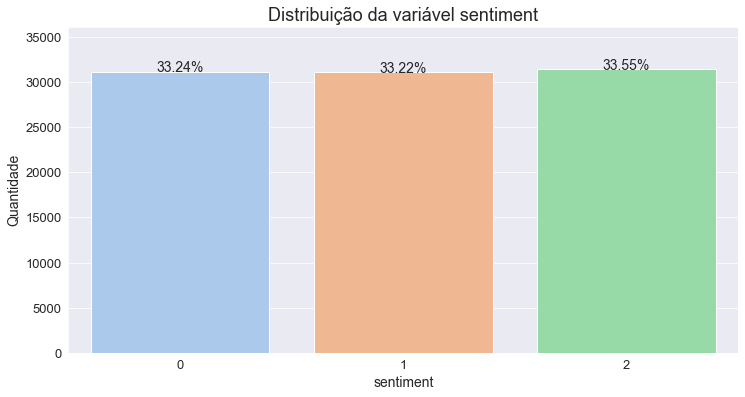

In [42]:
# Distribuição da variavel sentiment

col = 'sentiment'

total = len(dfc)

plt.figure(figsize=(12,6))
g = sns.countplot(x=col, data=dfc, palette=colors)
g.set_title(f"Distribuição da variável {col}")
g.set_xlabel(f"{col}")
g.set_ylabel("Quantidade")
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15)
plt.show()


---

**Conclusões:** 

Analisando a variável **sentiment** podemos constatar que o nosso dataframe contém quantidades de tweets balanceados, diminuindo a tendência do modelo para algum dos sentimentos.


#### query_used

- :(, se negativo (0);
- :), se positivo (1);
- "outros", se neutro (2)


In [43]:
# Quantidade de sentimentos

Counter(dfc['query_used']).most_common()


[(':(', 31130),
 (':)', 31113),
 ('folha', 4989),
 ('estadao', 3880),
 ('#fato', 3444),
 ('g1', 3434),
 ('exame', 3416),
 ('#trabalho', 3027),
 ('jornaloglobo', 2374),
 ('#oportunidade', 2350),
 ('veja', 2098),
 ('#noticia', 1113),
 ('#novidade', 916),
 ('#curiosidade', 381)]

In [44]:
# Avaliação da variável query_used

# Criação de nova variável substituindo os valores "outros" por :|, ou seja, diferente de ":(" e ":)" para 
# agrupar os sentimentos neutros

conditions = [
    (dfc['query_used'] != ':(') & (dfc['query_used'] != ':)'),
    (dfc['query_used'] == ':('),
    (dfc['query_used'] == ':)')]
choices = [':|', ':(', ':)']
dfc['sent_query_used'] = np.select(conditions, choices, default=np.NaN)


In [45]:
# Distribuição de tweets

temp_q = dfc.groupby('sent_query_used').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp_q

temp_q.rename(columns = {'tweet_text':'tweet_text_q'}, inplace = True)


In [46]:
# Concatenando os dataframes auxiliares para avaliar a quantidade de sentimentos e query_used

df_col = pd.concat([temp_q, temp], axis=1)
df_col


sent_query_used  tweet_text_q  sentiment  tweet_text
2  :|              31422         2          31422     
0  :(              31130         0          31130     
1  :)              31113         1          31113


---

**Conclusões**

Notem que a variável **query_used** foi utilizada para criar a variável de **sentiment** convertendo as strings ":(", ":)" e outros textos em valores numéricos, pois apresentam a mesma quantidade de linhas.


### Analisando as palavras dos textos

In [47]:
# Criando a lista de palavras e o vocabulário de palavras

dfc['list_words'] = dfc['join_f_words'].apply(lambda w:str(w).split())

# Criando vocabulário (collection) para armazenar as palavras e vezes que aparecem
top = Counter([item for sublist in dfc['list_words'] for item in sublist])

print(f"O vocabulário é formado por {len(top)} palavras!")


O vocabulário é formado por 42287 palavras!


In [48]:
# As 20 Palavras mais utilizadas nos textos

temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Palavras','Quantidade']
temp.style.background_gradient(cmap=cmap_colors)


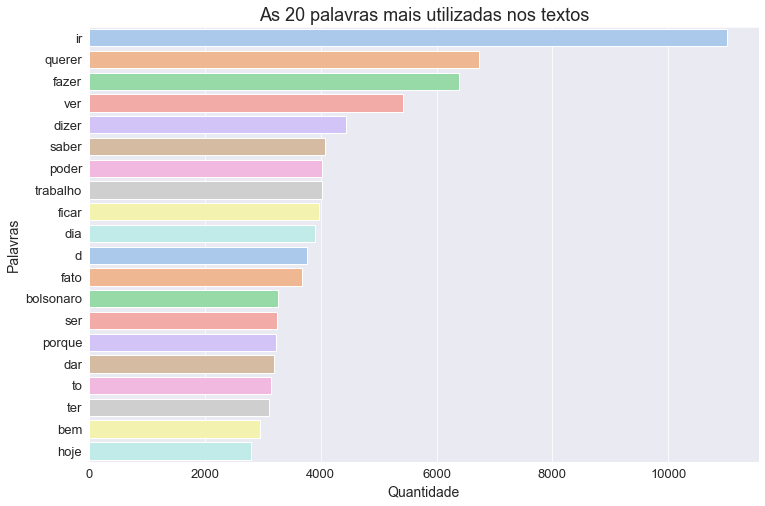

In [49]:
# Analisando a quantidade de palavras mais utilizadas

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp, palette=colors)
g.set_title(f"As 20 palavras mais utilizadas nos textos")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [50]:
# Analisando a quantidade de palavras mais utilizadas

fig = px.treemap(temp, path=['Palavras'], values='Quantidade',title='As 20 palavras mais utilizadas nos textos')
fig.show()


### Palavras mais utilizadas por Sentimento

In [51]:
# Criando dataframes por sentimentos

# negativo
Negative_sent = dfc[dfc['sentiment']==0]
Negative_sent.reset_index(drop=True, inplace=True)

# positivo
Positive_sent = dfc[dfc['sentiment']==1]
Positive_sent.reset_index(drop=True, inplace=True)

# neutro
Neutral_sent = dfc[dfc['sentiment']==2]
Neutral_sent.reset_index(drop=True, inplace=True)


In [52]:
# Lista auxiliar com todas as palavras do dataframe

raw_text = [word for word_list in dfc['list_words'] for word in word_list]


#### Sentimentos Negativos

In [53]:
# Palavras mais utilizadas em sentimentos negativos

top = Counter([item for sublist in Negative_sent['list_words'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Palavras','Quantidade']
temp_negative.style.background_gradient(cmap='Reds')


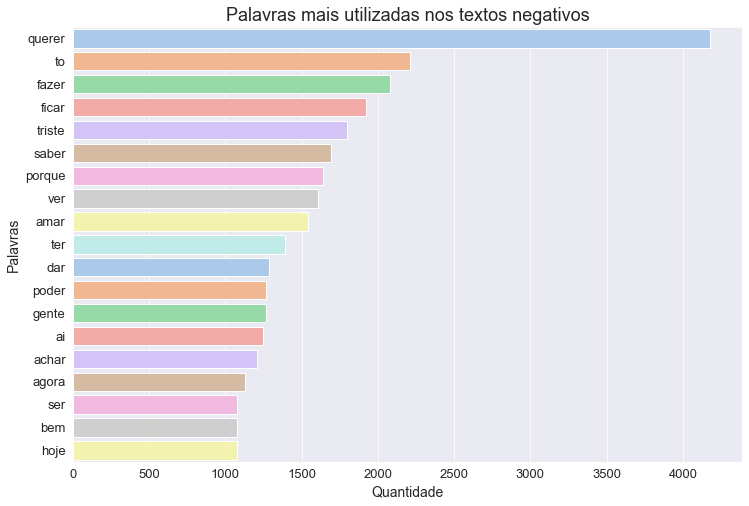

In [54]:
# Apresentação da quantidade de palavras mais utilizadas em sentimentos negativos

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp_negative, palette=colors)
g.set_title(f"Palavras mais utilizadas nos textos negativos")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [94]:
%%time

# O processamento desta célula leva em média 7 minutos, em uma máquina i7 com 12 cores e 32 ram 

# As 20 palavras utilizadas apenas para o sentimento negativo

Unique_Negative= words_unique(0, 20, raw_text)

print('As 20 palavras mais utilizadas apenas em Tweets negativos:')
Unique_Negative.style.background_gradient(cmap='Reds')


As 20 palavras mais utilizadas apenas em Tweets negativos:
Wall time: 5min 58s


In [56]:
# As 20 palavras utilizadas apenas para o sentimento negativos

fig = px.treemap(Unique_Negative, path=['words'], values='count',title='As 20 palavras mais utilizadas apenas em Tweets negativos')
fig.show()


#### Sentimentos Positivos

In [57]:
# Palavras mais utilizadas em sentimentos positivos

top = Counter([item for sublist in Positive_sent['list_words'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Palavras','Quantidade']
temp_positive.style.background_gradient(cmap=cmap_colors)


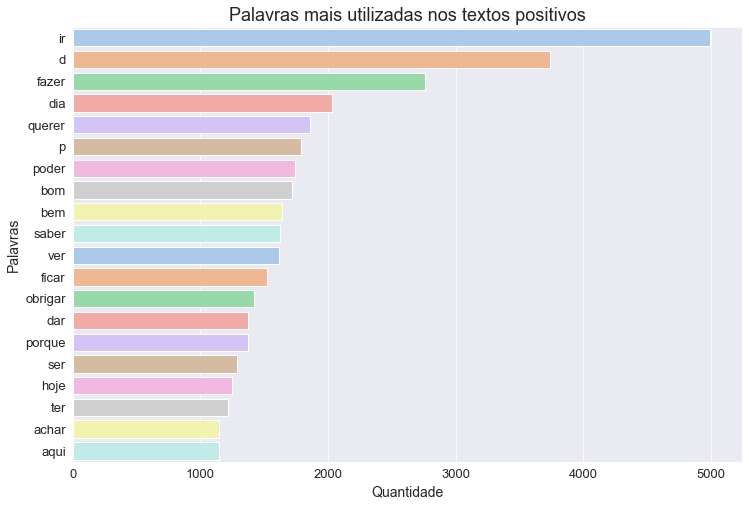

In [58]:
# Apresentação da quantidade de palavras mais utilizadas em sentimentos positivos

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp_positive, palette=colors)
g.set_title(f"Palavras mais utilizadas nos textos positivos")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [59]:
%%time

# O processamento desta célula leva em média 7 minutos, em uma máquina i7 com 12 cores e 32 ram 

# As 20 palavras utilizadas apenas para o sentimento positivo

Unique_Positive = words_unique(1, 20, raw_text)

print('As 20 palavras mais utilizadas apenas em Tweets positivos:')
Unique_Positive.style.background_gradient(cmap=cmap_colors)


As 20 palavras mais utilizadas apenas em Tweets positivos:
Wall time: 6min 19s


In [60]:
# Apresentação das palavras utilizadas em sentimentos positivos

fig = px.treemap(Unique_Positive, path=['words'], values='count',title='As 20 palavras mais utilizadas apenas em Tweets positivos')
fig.show()


#### Sentimentos Neutros

In [61]:
# Palavras mais utilizadas em sentimentos neutros

top = Counter([item for sublist in Neutral_sent['list_words'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Palavras','Quantidade']
temp_neutral.style.background_gradient(cmap=cmap_colors)


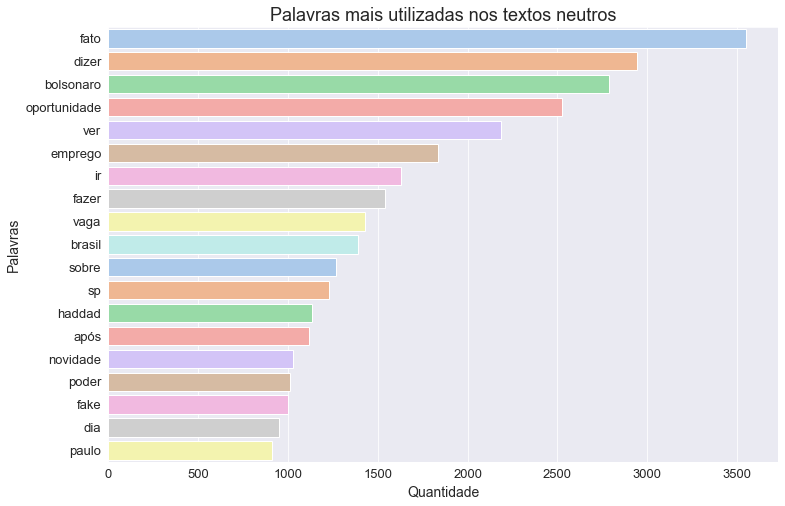

In [62]:
# Apresentação da quantidade de palavras mais utilizadas em sentimentos neutros

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp_neutral, palette=colors)
g.set_title(f"Palavras mais utilizadas nos textos neutros")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [63]:
%%time

# O processamento desta célula leva em média 5 minutos, em uma máquina i7 com 12 cores e 32 ram 

# As 20 palavras utilizadas apenas para o sentimento neutro

Unique_Neutral= words_unique(2, 20, raw_text)

print('As 20 palavras utilizadas apenas em Tweets neutros:')
Unique_Neutral.style.background_gradient(cmap=cmap_colors)


As 20 palavras utilizadas apenas em Tweets neutros:
Wall time: 5min 4s


In [64]:
# Apresentação das palavras utilizadas em sentimentos neutros

fig = px.treemap(Unique_Neutral, path=['words'], values='count',title='As 20 palavras mais utilizadas apenas em Tweets neutros')
fig.show()


#### WordClouds

**Sentimentos negativos**

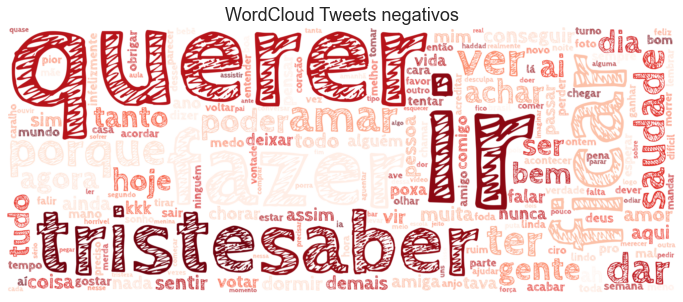

In [65]:
# WordCloud para Tweets negativos

text = ' '.join(Negative_sent['join_f_words'])
plot_wordcloud(text, title = 'WordCloud Tweets negativos', backcolor = 'white', clrmap = 'Reds')


**Sentimentos positivos**

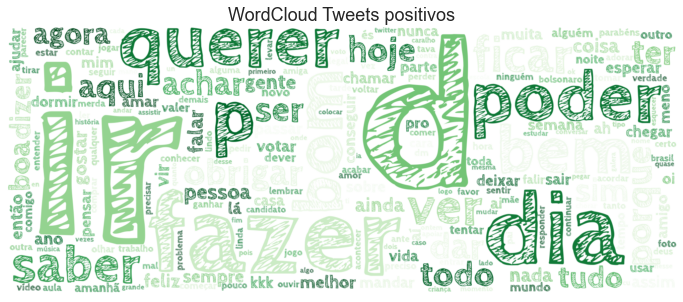

In [66]:
# WordCloud para Tweets positivos

text = ' '.join(Positive_sent['join_f_words'])
plot_wordcloud(text, title = 'WordCloud Tweets positivos', backcolor = 'white', clrmap = 'Greens')


**Sentimentos neutros**

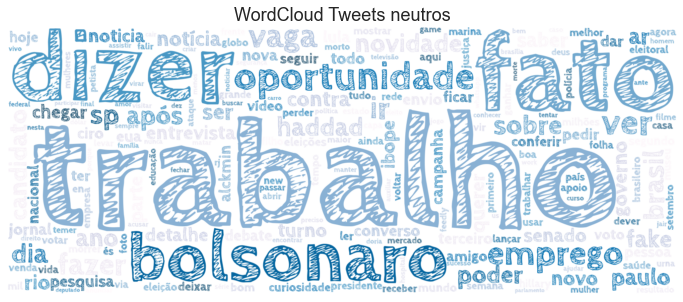

In [67]:
# WordCloud para Tweets neutros

text = ' '.join(Neutral_sent['join_f_words'])
plot_wordcloud(text, title = 'WordCloud Tweets neutros', backcolor = 'white', clrmap = 'PuBu')


---

**Conclusões:** 

- Podem ver que as mesmas palavras são comuns nos três segmentos;


- Isso é interessante porque algumas palavras são mais de natureza negativa e outras palavras são mais de natureza positiva, o que significa que o agrupamento das palavras (frases) definem os sentimentos;


- Olhando para as palavras únicas de cada sentimento, temos mais clareza sobre os dados, estas palavras únicas são determinantes para o sentimento dos tweets;


## 4. Treinamento do modelo

### Separando conjunto de dados Treino e Teste

In [68]:
# Carregando os arquivos tratados para não reprocessar a etapa 2. Pré-processamento e transformações

# Definindo o nome do arquivo
if use_normalize==1:
    file_name = './dados/train/Train3Classes_with_Token_normalize.csv'
    file_name_s = './dados/subm/Subm3Classes_with_Token_normalize.csv'
else:
    file_name = './dados/train/Train3Classes_with_Token.csv'
    file_name_s = './dados/subm/Subm3Classes_with_Token.csv'
  
# Salvando o CSV
try:
    # Carregar o dataframe
    dfc = reduce_mem_usage(pd.read_csv(file_name))
    dfs = reduce_mem_usage(pd.read_csv(file_name_s))
    
    #Incluindo lista de palavras
    dfc['list_words'] = dfc['join_f_words'].apply(lambda w:str(w).split())
    
    print(f'Arquivo carregado com successo.')
    
except:
    print(f'Ocorreu um erro no carregamento do arquivo.')
    

Mem. usage decreased to  2.50 Mb (50.0% reduction)
Mem. usage decreased to  0.24 Mb (29.2% reduction)
Arquivo carregado com successo.


In [69]:
# A nossa base de dados tem mais de 90 mil linhas e a quantidade de palavras disponíveis nos textos é muito grande. 
# Para evitar problemas de alocação de memória, processamento dos textos e modelagem, vamos criar uma amostra com 40% da base:

# Caso o notebook apresente problemas de alocação de memória, favor diminuir o percentual da amostra dos dados.

dfm = dfc.sample(frac=0.4, replace=False)


In [70]:
# Vamos dividir os nossos dados numa matriz X que contém as características a treinar, 
# e uma matriz y com a variável alvo, neste caso a coluna covid_res. 

X = dfm['join_f_words']
y = dfm['sentiment']


In [71]:
# Vamos dividir os dados num conjunto de Train e num conjunto de Test. 
# Iremos treinar o modelo no conjunto de treino e depois utilizaremos o conjunto de testes para avaliar o modelo

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)


In [72]:
# Quantidade total da variável "target" (sentiment)

y.value_counts().sort_index()


0    12472
1    12427
2    12567
Name: sentiment, dtype: int64

In [73]:
# Quantidade separada para o conjunto de treino inicial

y_train.value_counts().sort_index()


0    8741
1    8701
2    8784
Name: sentiment, dtype: int64

In [74]:
# Quantidade separada para o conjunto de teste inicial

y_test.value_counts().sort_index()#(normalize = True)


0    3731
1    3726
2    3783
Name: sentiment, dtype: int64

### Processando modelos

In [75]:
# Lista de modelos para testes

list_models = [
    {'model_name': 'Dummy Classifier uniform',
     'estimator' : DummyClassifier(strategy='uniform', random_state=random_seed)},    
    {'model_name': 'Linear Support Vector Machine',
     'estimator' : LinearSVC(random_state=random_seed)},
    {'model_name': 'Stochastic Gradient Descent Classifier',
     'estimator' : SGDClassifier(n_jobs=-1, loss='modified_huber',random_state=random_seed)},
    {'model_name': 'LightGBM',
     'estimator' : LGBMClassifier(random_state=random_seed)},
    {'model_name': 'Logistic Regression',
     'estimator' : LogisticRegression(random_state=random_seed)},
    {'model_name': 'Classifier Ridge regression',
     'estimator' : RidgeClassifier(random_state=random_seed)},
    {'model_name': 'Naive Bayes Gaussian',
     'estimator' : GaussianNB()},
    {'model_name': 'Bernoulli Naive Bayes',
     'estimator' : BernoulliNB()}
]

# Os modelos abaixo foram retirados por apresentarem tempo de processamento superior 20 minutos com sample de 40% 
# e apresentarem resultado de acurácia muito similares com os modelos escolhidos

#{'model_name': 'Decision Tree',
# 'estimator' : DecisionTreeClassifier(random_state=random_seed)},
#{'model_name': 'Random Forest',
# 'estimator' : RandomForestClassifier(random_state=random_seed)}, 
#{'model_name': 'AdaBoost',
# 'estimator' : AdaBoostClassifier(random_state=random_seed)},
#{'model_name': 'GradientBoosting',
# 'estimator' : GradientBoostingClassifier(random_state=random_seed)},
#{'model_name': 'XGBoost',
# 'estimator' : XGBClassifier(random_state=random_seed)}
#{'model_name': 'Support Vector Machine',
# 'estimator' : SVC(random_state=random_seed)},
#{'model_name': 'KNN (k-nearest neighbor)',
# 'estimator' : KNeighborsClassifier(n_neighbors=3)},
#{'model_name': 'Multinomial Naive Bayes',
#'estimator' : MultinomialNB()},


#### Técnica CountVectorizer

In [76]:
# Instanciando CountVectorizer

cv = CountVectorizer()


In [77]:
# Treinando o modelo com os conjuntos de dados de treinamento 

X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()


**Processando modelos**


Model      : Dummy Classifier uniform
Accuracy   : 0.3351 
Precision  : 0.3352 
Recall     : 0.3351 
F1 - Score : 0.3351 
MAE        : 0.8894 
RMSE       : 1.1569 
R2         : -1.0023 

              precision    recall  f1-score   support

           0       0.33      0.33      0.33      3731
           1       0.34      0.34      0.34      3726
           2       0.34      0.33      0.34      3783

    accuracy                           0.34     11240
   macro avg       0.34      0.34      0.34     11240
weighted avg       0.34      0.34      0.34     11240



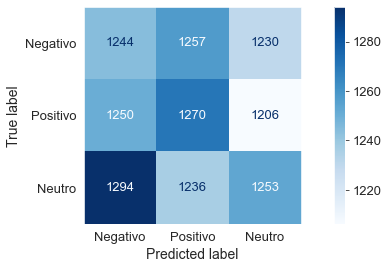

Partial time: 0:00:00.220989

Model      : Linear Support Vector Machine
Accuracy   : 0.7553 
Precision  : 0.7591 
Recall     : 0.7553 
F1 - Score : 0.7564 
MAE        : 0.2624 
RMSE       : 0.5457 
R2         : 0.5546 

              precision    recall  f1-score   support

           0       0.67      0.74      0.71      3731
           1       0.67      0.63      0.65      3726
           2       0.93      0.89      0.91      3783

    accuracy                           0.76     11240
   macro avg       0.76      0.75      0.76     11240
weighted avg       0.76      0.76      0.76     11240



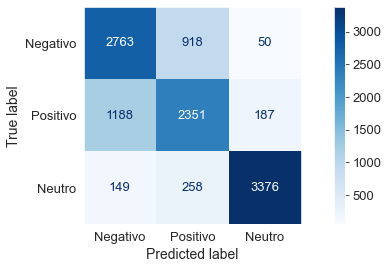

Partial time: 0:00:09.482953

Model      : Stochastic Gradient Descent Classifier
Accuracy   : 0.7610 
Precision  : 0.7641 
Recall     : 0.7610 
F1 - Score : 0.7618 
MAE        : 0.2556 
RMSE       : 0.5375 
R2         : 0.5679 

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      3731
           1       0.67      0.64      0.66      3726
           2       0.94      0.90      0.92      3783

    accuracy                           0.76     11240
   macro avg       0.76      0.76      0.76     11240
weighted avg       0.76      0.76      0.76     11240



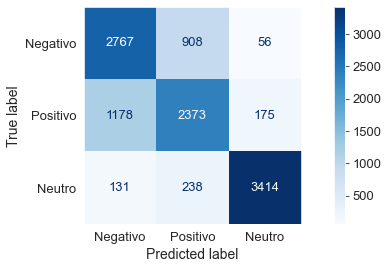

Partial time: 0:01:02.182255

Model      : LightGBM
Accuracy   : 0.7451 
Precision  : 0.7539 
Recall     : 0.7451 
F1 - Score : 0.7472 
MAE        : 0.2745 
RMSE       : 0.5600 
R2         : 0.5309 

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      3731
           1       0.62      0.73      0.67      3726
           2       0.91      0.86      0.88      3783

    accuracy                           0.75     11240
   macro avg       0.75      0.74      0.75     11240
weighted avg       0.75      0.75      0.75     11240



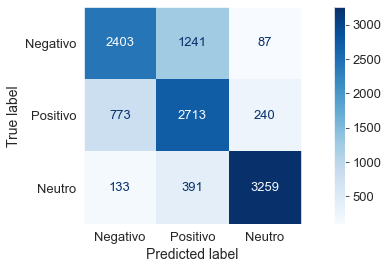

Partial time: 0:00:07.472293

Model      : Logistic Regression
Accuracy   : 0.7687 
Precision  : 0.7711 
Recall     : 0.7687 
F1 - Score : 0.7694 
MAE        : 0.2477 
RMSE       : 0.5296 
R2         : 0.5805 

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      3731
           1       0.68      0.66      0.67      3726
           2       0.94      0.91      0.92      3783

    accuracy                           0.77     11240
   macro avg       0.77      0.77      0.77     11240
weighted avg       0.77      0.77      0.77     11240



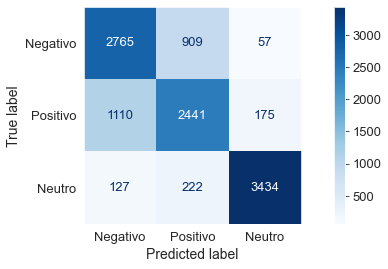

Partial time: 0:01:41.484623

Model      : Classifier Ridge regression
Accuracy   : 0.7447 
Precision  : 0.7505 
Recall     : 0.7447 
F1 - Score : 0.7462 
MAE        : 0.2784 
RMSE       : 0.5696 
R2         : 0.5146 

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      3731
           1       0.66      0.62      0.64      3726
           2       0.93      0.87      0.90      3783

    accuracy                           0.74     11240
   macro avg       0.75      0.74      0.75     11240
weighted avg       0.75      0.74      0.75     11240



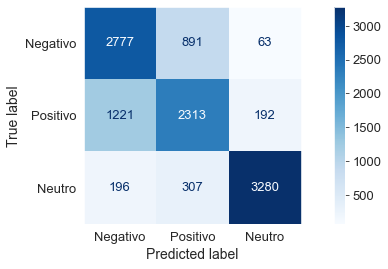

Partial time: 0:05:17.565229

Model      : Naive Bayes Gaussian
Accuracy   : 0.5764 
Precision  : 0.5956 
Recall     : 0.5764 
F1 - Score : 0.5593 
MAE        : 0.4939 
RMSE       : 0.7965 
R2         : 0.0509 

              precision    recall  f1-score   support

           0       0.50      0.84      0.63      3731
           1       0.44      0.26      0.33      3726
           2       0.84      0.63      0.72      3783

    accuracy                           0.58     11240
   macro avg       0.59      0.58      0.56     11240
weighted avg       0.60      0.58      0.56     11240



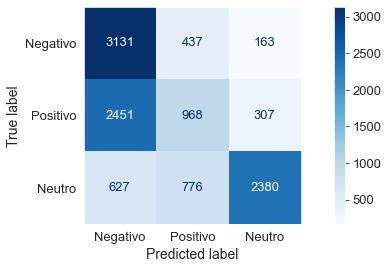

Partial time: 0:00:20.638229

Model      : Bernoulli Naive Bayes
Accuracy   : 0.7497 
Precision  : 0.7647 
Recall     : 0.7497 
F1 - Score : 0.7475 
MAE        : 0.2728 
RMSE       : 0.5637 
R2         : 0.5246 

              precision    recall  f1-score   support

           0       0.64      0.85      0.73      3731
           1       0.71      0.53      0.61      3726
           2       0.95      0.87      0.91      3783

    accuracy                           0.75     11240
   macro avg       0.76      0.75      0.75     11240
weighted avg       0.76      0.75      0.75     11240



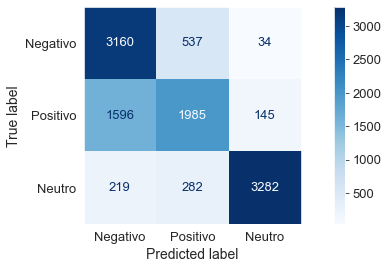

Partial time: 0:00:56.728525
Wall time: 9min 35s


In [78]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 5 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Processando os modelos baseado na list_models
score = []

test_models (list_models,
             "model_name",
             "estimator",
             "CountVectorizer",
             X_train_cv,
             X_test_cv,
             y_train,
             y_test)


#### Técnica TF-IDF

In [79]:
#Instanciando TF-IDF

tfidf = TfidfVectorizer(use_idf = True)
    

In [80]:
# Treinando o modelo com os conjuntos de dados de treinamento 

X_train_tfidf = tfidf.fit_transform(X_train).todense()
X_test_tfidf  = tfidf.transform(X_test).todense()


**Processando modelos**


Model      : Dummy Classifier uniform
Accuracy   : 0.3351 
Precision  : 0.3352 
Recall     : 0.3351 
F1 - Score : 0.3351 
MAE        : 0.8894 
RMSE       : 1.1569 
R2         : -1.0023 

              precision    recall  f1-score   support

           0       0.33      0.33      0.33      3731
           1       0.34      0.34      0.34      3726
           2       0.34      0.33      0.34      3783

    accuracy                           0.34     11240
   macro avg       0.34      0.34      0.34     11240
weighted avg       0.34      0.34      0.34     11240



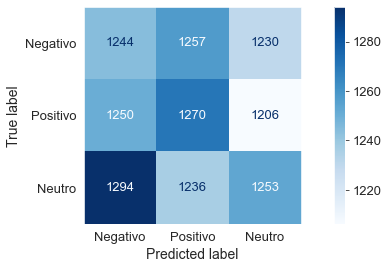

Partial time: 0:00:00.327378

Model      : Linear Support Vector Machine
Accuracy   : 0.7735 
Precision  : 0.7719 
Recall     : 0.7735 
F1 - Score : 0.7726 
MAE        : 0.2410 
RMSE       : 0.5196 
R2         : 0.5961 

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      3731
           1       0.69      0.67      0.68      3726
           2       0.92      0.93      0.93      3783

    accuracy                           0.77     11240
   macro avg       0.77      0.77      0.77     11240
weighted avg       0.77      0.77      0.77     11240



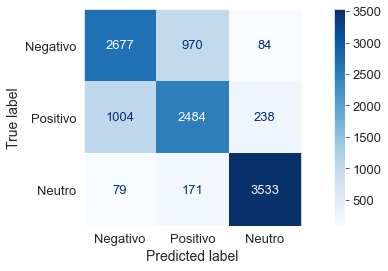

Partial time: 0:00:07.297570

Model      : Stochastic Gradient Descent Classifier
Accuracy   : 0.7815 
Precision  : 0.7787 
Recall     : 0.7815 
F1 - Score : 0.7797 
MAE        : 0.2325 
RMSE       : 0.5103 
R2         : 0.6104 

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      3731
           1       0.69      0.69      0.69      3726
           2       0.90      0.95      0.92      3783

    accuracy                           0.78     11240
   macro avg       0.78      0.78      0.78     11240
weighted avg       0.78      0.78      0.78     11240



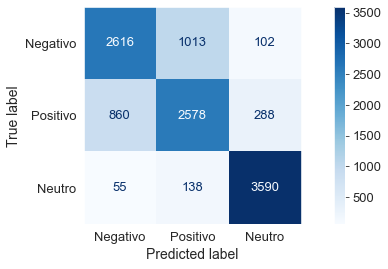

Partial time: 0:01:02.153486

Model      : LightGBM
Accuracy   : 0.7534 
Precision  : 0.7611 
Recall     : 0.7534 
F1 - Score : 0.7554 
MAE        : 0.2634 
RMSE       : 0.5450 
R2         : 0.5556 

              precision    recall  f1-score   support

           0       0.73      0.66      0.70      3731
           1       0.63      0.73      0.68      3726
           2       0.92      0.87      0.89      3783

    accuracy                           0.75     11240
   macro avg       0.76      0.75      0.75     11240
weighted avg       0.76      0.75      0.76     11240



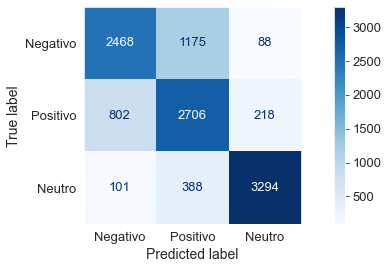

Partial time: 0:00:09.884665

Model      : Logistic Regression
Accuracy   : 0.7825 
Precision  : 0.7801 
Recall     : 0.7825 
F1 - Score : 0.7811 
MAE        : 0.2336 
RMSE       : 0.5156 
R2         : 0.6023 

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      3731
           1       0.70      0.69      0.69      3726
           2       0.91      0.94      0.92      3783

    accuracy                           0.78     11240
   macro avg       0.78      0.78      0.78     11240
weighted avg       0.78      0.78      0.78     11240



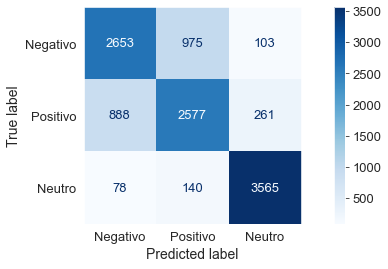

Partial time: 0:01:51.521129

Model      : Classifier Ridge regression
Accuracy   : 0.7757 
Precision  : 0.7730 
Recall     : 0.7757 
F1 - Score : 0.7742 
MAE        : 0.2391 
RMSE       : 0.5183 
R2         : 0.5982 

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      3731
           1       0.69      0.66      0.68      3726
           2       0.90      0.94      0.92      3783

    accuracy                           0.78     11240
   macro avg       0.77      0.77      0.77     11240
weighted avg       0.77      0.78      0.77     11240



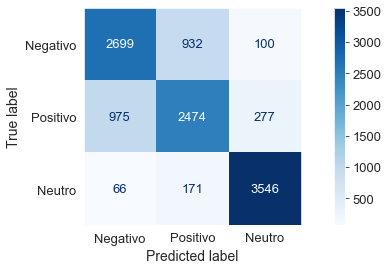

Partial time: 0:02:34.916025

Model      : Naive Bayes Gaussian
Accuracy   : 0.5818 
Precision  : 0.5943 
Recall     : 0.5818 
F1 - Score : 0.5653 
MAE        : 0.4877 
RMSE       : 0.7916 
R2         : 0.0625 

              precision    recall  f1-score   support

           0       0.51      0.82      0.63      3731
           1       0.46      0.27      0.34      3726
           2       0.81      0.65      0.72      3783

    accuracy                           0.58     11240
   macro avg       0.59      0.58      0.56     11240
weighted avg       0.59      0.58      0.57     11240



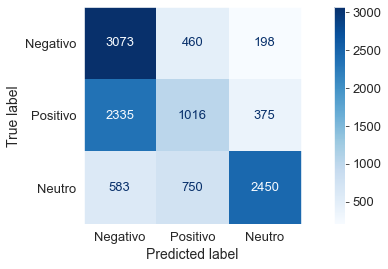

Partial time: 0:00:15.457976

Model      : Bernoulli Naive Bayes
Accuracy   : 0.7497 
Precision  : 0.7647 
Recall     : 0.7497 
F1 - Score : 0.7475 
MAE        : 0.2728 
RMSE       : 0.5637 
R2         : 0.5246 

              precision    recall  f1-score   support

           0       0.64      0.85      0.73      3731
           1       0.71      0.53      0.61      3726
           2       0.95      0.87      0.91      3783

    accuracy                           0.75     11240
   macro avg       0.76      0.75      0.75     11240
weighted avg       0.76      0.75      0.75     11240



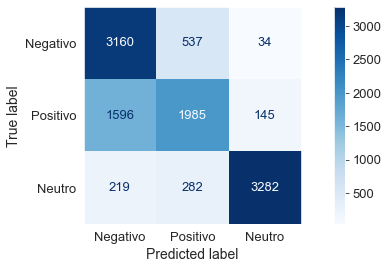

Partial time: 0:00:06.680410
Wall time: 6min 8s


In [81]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 5 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Processando os modelos baseado na list_models

test_models (list_models,
             "model_name",
             "estimator",
             "TF-IDF",
             X_train_tfidf,
             X_test_tfidf,
             y_train,
             y_test)


#### Técnica Doc2Vec

In [82]:
# Instanciando Doc2Vec

d2v = doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=20)


In [83]:
# Vamos dividir os nossos dados numa matriz X que contém as características a treinar, 
# e uma matriz y com a variável alvo, neste caso a coluna covid_res. 

X_d2v = dfm['list_words']
y_d2v = dfm['sentiment']


In [84]:
# Vamos dividir os dados num conjunto de Train e num conjunto de Test. 
# Iremos treinar o modelo no conjunto de treino e depois utilizaremos o conjunto de testes para avaliar o modelo

X_train_d2v, X_test_d2v, y_train_d2v, y_test_d2v = train_test_split(X_d2v, y_d2v, test_size=0.3, random_state=random_seed)


In [85]:
%%time
# Preparando a classe de treinamento e teste

# O processamento desta célula com o processamento dos modelos leva em média 2 minutos, em uma máquina i7 com 12 cores e 32 ram 

train_corpus = read_corpus(X_train_d2v)
test_corpus = read_corpus(X_test_d2v, tokens_only=True)

d2v.build_vocab(train_corpus)

d2v.train(train_corpus, total_examples=d2v.corpus_count, epochs=d2v.epochs)

X_train_d2v = np.array(list(map(d2v.infer_vector, X_train_d2v)))
X_test_d2v = np.array(list(map(d2v.infer_vector, X_test_d2v)))


Wall time: 1min 12s


**Processando modelos**


Model      : Dummy Classifier uniform
Accuracy   : 0.3351 
Precision  : 0.3352 
Recall     : 0.3351 
F1 - Score : 0.3351 
MAE        : 0.8894 
RMSE       : 1.1569 
R2         : -1.0023 

              precision    recall  f1-score   support

           0       0.33      0.33      0.33      3731
           1       0.34      0.34      0.34      3726
           2       0.34      0.33      0.34      3783

    accuracy                           0.34     11240
   macro avg       0.34      0.34      0.34     11240
weighted avg       0.34      0.34      0.34     11240



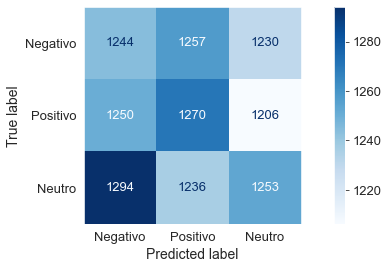

Partial time: 0:00:00.185041

Model      : Linear Support Vector Machine
Accuracy   : 0.6498 
Precision  : 0.6460 
Recall     : 0.6498 
F1 - Score : 0.6462 
MAE        : 0.4319 
RMSE       : 0.7715 
R2         : 0.1096 

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      3731
           1       0.61      0.53      0.57      3726
           2       0.72      0.80      0.76      3783

    accuracy                           0.65     11240
   macro avg       0.65      0.65      0.65     11240
weighted avg       0.65      0.65      0.65     11240



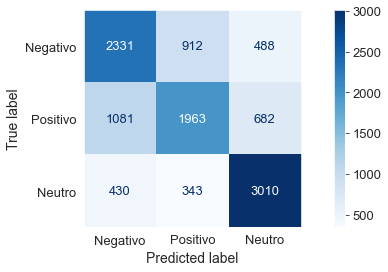

Partial time: 0:00:02.817310

Model      : Stochastic Gradient Descent Classifier
Accuracy   : 0.6452 
Precision  : 0.6477 
Recall     : 0.6452 
F1 - Score : 0.6359 
MAE        : 0.4512 
RMSE       : 0.8024 
R2         : 0.0368 

              precision    recall  f1-score   support

           0       0.59      0.68      0.63      3731
           1       0.67      0.44      0.53      3726
           2       0.69      0.82      0.74      3783

    accuracy                           0.65     11240
   macro avg       0.65      0.64      0.64     11240
weighted avg       0.65      0.65      0.64     11240



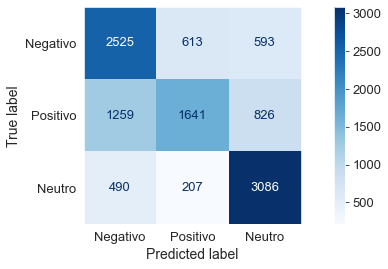

Partial time: 0:00:00.454020

Model      : LightGBM
Accuracy   : 0.6944 
Precision  : 0.6952 
Recall     : 0.6944 
F1 - Score : 0.6936 
MAE        : 0.3549 
RMSE       : 0.6734 
R2         : 0.3216 

              precision    recall  f1-score   support

           0       0.63      0.70      0.66      3731
           1       0.63      0.56      0.59      3726
           2       0.83      0.82      0.82      3783

    accuracy                           0.69     11240
   macro avg       0.69      0.69      0.69     11240
weighted avg       0.70      0.69      0.69     11240



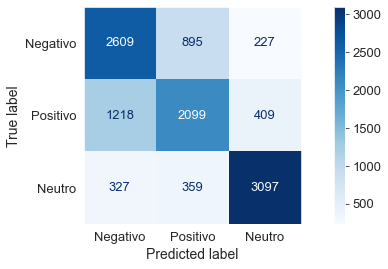

Partial time: 0:00:01.569973

Model      : Logistic Regression
Accuracy   : 0.6533 
Precision  : 0.6520 
Recall     : 0.6533 
F1 - Score : 0.6525 
MAE        : 0.4217 
RMSE       : 0.7561 
R2         : 0.1448 

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      3731
           1       0.59      0.57      0.58      3726
           2       0.75      0.77      0.76      3783

    accuracy                           0.65     11240
   macro avg       0.65      0.65      0.65     11240
weighted avg       0.65      0.65      0.65     11240



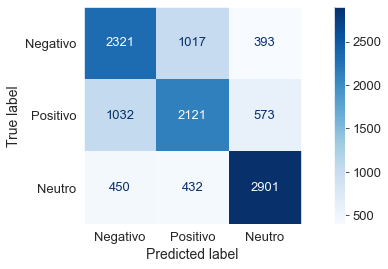

Partial time: 0:00:01.096204

Model      : Classifier Ridge regression
Accuracy   : 0.6464 
Precision  : 0.6424 
Recall     : 0.6464 
F1 - Score : 0.6418 
MAE        : 0.4404 
RMSE       : 0.7836 
R2         : 0.0814 

              precision    recall  f1-score   support

           0       0.61      0.62      0.61      3731
           1       0.62      0.52      0.56      3726
           2       0.70      0.80      0.75      3783

    accuracy                           0.65     11240
   macro avg       0.64      0.65      0.64     11240
weighted avg       0.64      0.65      0.64     11240



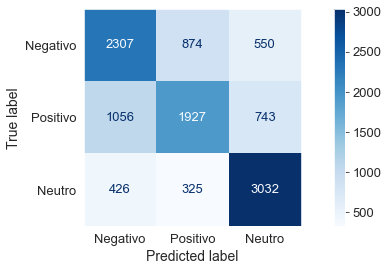

Partial time: 0:00:00.205037

Model      : Naive Bayes Gaussian
Accuracy   : 0.5569 
Precision  : 0.5892 
Recall     : 0.5569 
F1 - Score : 0.5536 
MAE        : 0.5585 
RMSE       : 0.8884 
R2         : -0.1806 

              precision    recall  f1-score   support

           0       0.46      0.72      0.56      3731
           1       0.51      0.34      0.41      3726
           2       0.80      0.61      0.69      3783

    accuracy                           0.56     11240
   macro avg       0.59      0.56      0.55     11240
weighted avg       0.59      0.56      0.55     11240



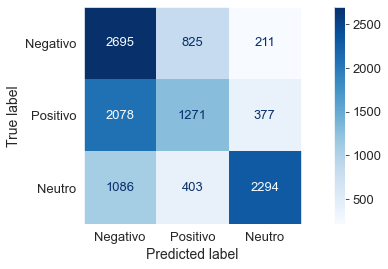

Partial time: 0:00:00.189962

Model      : Bernoulli Naive Bayes
Accuracy   : 0.5905 
Precision  : 0.5879 
Recall     : 0.5905 
F1 - Score : 0.5887 
MAE        : 0.5130 
RMSE       : 0.8485 
R2         : -0.0770 

              precision    recall  f1-score   support

           0       0.58      0.55      0.56      3731
           1       0.54      0.52      0.53      3726
           2       0.65      0.70      0.67      3783

    accuracy                           0.59     11240
   macro avg       0.59      0.59      0.59     11240
weighted avg       0.59      0.59      0.59     11240



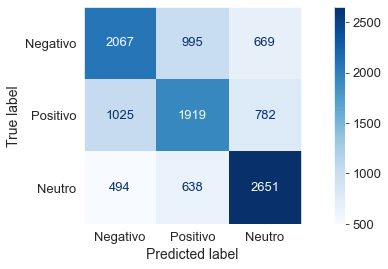

Partial time: 0:00:00.206013
Wall time: 6.72 s


In [86]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 7 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Processando os modelos baseado na list_models

test_models (list_models,
             "model_name",
             "estimator",
             "Doc2Vec",
             X_train_d2v,
             X_test_d2v,
             y_train_d2v,
             y_test_d2v)


#### Avaliação dos modelos

In [87]:
# Conmparação das pontuações após técnicas de balanceamento
# Ordenando a pontuação
score.sort(key = lambda y:y[2],reverse =True)

# Exibindo a pontuação
dfscore = pd.DataFrame (score, columns = ['Modelo', 'Técnica', 'Acurácia'])

# Apresenta o modelo que obteve a melhor acurácia
print(f'O modelo {dfscore.iloc[0][0]} apresentou a melhor acurácia {dfscore.iloc[0][2]}.\n')
print("Comparação da Acurácia dos modelos: ")
dfscore

O modelo Logistic Regression apresentou a melhor acurácia 0.7824733096085409.

Comparação da Acurácia dos modelos: 


Modelo          Técnica  Acurácia
0   Logistic Regression                     TF-IDF           0.782473
1   Stochastic Gradient Descent Classifier  TF-IDF           0.781495
2   Classifier Ridge regression             TF-IDF           0.775712
3   Linear Support Vector Machine           TF-IDF           0.773488
4   Logistic Regression                     CountVectorizer  0.768683
5   Stochastic Gradient Descent Classifier  CountVectorizer  0.761032
6   Linear Support Vector Machine           CountVectorizer  0.755338
7   LightGBM                                TF-IDF           0.753381
8   Bernoulli Naive Bayes                   CountVectorizer  0.749733
9   Bernoulli Naive Bayes                   TF-IDF           0.749733
10  LightGBM                                CountVectorizer  0.745107
11  Classifier Ridge regression             CountVectorizer  0.744662
12  LightGBM                                Doc2Vec          0.694395
13  Logistic Regression                     Doc2Vec          0.653292
14  Linear Support Vector Machine           Doc2Vec          0.649822
15  Classifier Ridge regression             Doc2Vec          0.646441
16  Stochastic Gradient Descent Classifier  Doc2Vec          0.645196
17  Bernoulli Naive Bayes                   Doc2Vec          0.590480
18  Naive Bayes Gaussian                    TF-IDF           0.581762
19  Naive Bayes Gaussian                    CountVectorizer  0.576423
20  Naive Bayes Gaussian                    Doc2Vec          0.556940
21  Dummy Classifier uniform                CountVectorizer  0.335142
22  Dummy Classifier uniform                TF-IDF           0.335142
23  Dummy Classifier uniform                Doc2Vec          0.335142

--- 

**Conclusões**

Os modelos listados para avaliação foram escolhidos pelo critério de tempo de de processamento e acurácia para uma amostra de 40% do dataframe. 

A lista pode ser acrescida de outros modelos, porém o tempo de processamento do notebook pode ser extremamente longo, exemplo GradientBoostingClassifier com tempo de processamento superior a 40 min e acurácia similar ao Stochastic Gradient Descent Classifier que executa em segundos.

Os modelos foram treinados com as amostras utilizando técnicas para conversão de texto de Bag of Words (BoW) ContVectorizer / TF-IDF e Doc2Vec.

O critério de avaliação levou em consideração apenas o maior resultado apresentado pela acurácia do modelo. 

Nos diversos testes 2 modelos apresentaram a melhor acurácia que foram **Logistic Regression** e **Stochastic Gradient Descent Classifier**.


#### Otimização do Modelo

##### Stochastic Gradient Descent Classifier

In [88]:
# Modelo que apresentou a melhor acurácia

model = SGDClassifier(n_jobs=-1, max_iter=1000, random_state=random_seed)
 

###### Aplicando GridSearchCV

In [89]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 30 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Definindo valores iniciais para ajuste de parametro de reforço

# LogisticRegression
# param_gs = {'C': [1, 10, 100], 'penalty': ['l2'], 'max_iter': list(range(100,300,100))}

# SGDClassifier
param_gs = {'alpha': [0.0001, 0.001, 0.01, 0.1], 'penalty': ['l2'], "loss" : ["hinge", "log", "modified_huber"]}


# Instanciando GridSearchCV com a variação dos parametros 
gsearch = GridSearchCV(estimator=model, param_grid=param_gs, scoring='accuracy', refit=True, cv=3, verbose=2)

# Treinando o modelo com os conjuntos de dados
gsearch.fit(X_train_tfidf, y_train)

# Apresentação dos melhores parametros e melhor resultado
print('\nPrecisão média: %.5f' % gsearch.best_score_)
print('Configuração: %s' % gsearch.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  21.6s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  23.7s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  23.1s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  19.2s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  15.0s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  15.5s
[CV] END ......alpha=0.0001, loss=modified_huber, penalty=l2; total time=  29.9s
[CV] END ......alpha=0.0001, loss=modified_huber, penalty=l2; total time=  30.2s
[CV] END ......alpha=0.0001, loss=modified_huber, penalty=l2; total time=  26.3s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=  11.6s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=  11.5s
[CV] END ................alpha=0.001, loss=hinge

##### Aplicando RandomizedSearchCV

In [90]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 30 minutos, em uma máquina i7 com 12 cores e 32 ram 

# LogisticRegression
#param_rs = {'C': [1, 10, 100], 'penalty': ['l2'], 'max_iter': list(range(100,300,100))}

# SGDClassifier
param_rs = {'alpha': [0.0001, 0.001, 0.01, 0.1], 'penalty': ['l2'], "loss" : ["hinge", "log", "modified_huber"]}

# Instanciando RandomizedSearchCV com a variação dos parametros 
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_rs, scoring='accuracy', n_iter=100, cv=3, verbose=2)

# Treinando o modelo com os conjuntos de dados
rsearch.fit(X_train_tfidf, y_train)

# Apresentação dos melhores parametros e melhor resultado
print('\nPrecisão média: %.5f' % rsearch.best_score_)
print('Configuração: %s' % rsearch.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  20.8s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  23.3s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  23.0s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  18.7s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  15.2s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  15.5s
[CV] END ......alpha=0.0001, loss=modified_huber, penalty=l2; total time=  29.8s
[CV] END ......alpha=0.0001, loss=modified_huber, penalty=l2; total time=  30.7s
[CV] END ......alpha=0.0001, loss=modified_huber, penalty=l2; total time=  28.5s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=  12.0s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=  12.6s
[CV] END ................alpha=0.001, loss=hinge

##### Logistic Regression

In [91]:
# Modelo que apresentou a melhor acurácia

model = LogisticRegression(random_state=random_seed)
 

###### Aplicando **GridSearchCV**

In [92]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 30 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Definindo valores iniciais para ajuste de parametro de reforço

# LogisticRegression
param_gs = {'C': [1, 10, 100], 'penalty': ['l2'], 'max_iter': list(range(100,300,100))}

# Instanciando GridSearchCV com a variação dos parametros 
gsearch = GridSearchCV(estimator=model, param_grid=param_gs, scoring='accuracy', refit=True, cv=3, verbose=2)

# Treinando o modelo com os conjuntos de dados
gsearch.fit(X_train_tfidf, y_train)

# Apresentação dos melhores parametros e melhor resultado
print('\nPrecisão média: %.5f' % gsearch.best_score_)
print('Configuração: %s' % gsearch.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ......................C=1, max_iter=100, penalty=l2; total time=  59.5s
[CV] END ......................C=1, max_iter=100, penalty=l2; total time= 1.2min
[CV] END ......................C=1, max_iter=100, penalty=l2; total time= 1.1min
[CV] END ......................C=1, max_iter=200, penalty=l2; total time= 1.5min
[CV] END ......................C=1, max_iter=200, penalty=l2; total time= 1.3min
[CV] END ......................C=1, max_iter=200, penalty=l2; total time= 1.4min
[CV] END .....................C=10, max_iter=100, penalty=l2; total time=  59.4s
[CV] END .....................C=10, max_iter=100, penalty=l2; total time= 1.1min
[CV] END .....................C=10, max_iter=100, penalty=l2; total time= 1.0min
[CV] END .....................C=10, max_iter=200, penalty=l2; total time= 1.9min
[CV] END .....................C=10, max_iter=200, penalty=l2; total time= 2.3min
[CV] END .....................C=10, max_iter=200,

##### Aplicando RandomizedSearchCV

In [93]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 30 minutos, em uma máquina i7 com 12 cores e 32 ram 

# LogisticRegression
param_rs = {'C': [1, 10, 100], 'penalty': ['l2'], 'max_iter': list(range(100,300,100))}

# Instanciando RandomizedSearchCV com a variação dos parametros 
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_rs, scoring='accuracy', n_iter=100, cv=3, verbose=2)

# Treinando o modelo com os conjuntos de dados
rsearch.fit(X_train_tfidf, y_train)

# Apresentação dos melhores parametros e melhor resultado
print('\nPrecisão média: %.5f' % rsearch.best_score_)
print('Configuração: %s' % rsearch.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ......................C=1, max_iter=100, penalty=l2; total time=  59.9s
[CV] END ......................C=1, max_iter=100, penalty=l2; total time= 1.1min
[CV] END ......................C=1, max_iter=100, penalty=l2; total time= 1.1min
[CV] END ......................C=1, max_iter=200, penalty=l2; total time= 1.5min
[CV] END ......................C=1, max_iter=200, penalty=l2; total time= 1.2min
[CV] END ......................C=1, max_iter=200, penalty=l2; total time= 1.4min
[CV] END .....................C=10, max_iter=100, penalty=l2; total time=  59.9s
[CV] END .....................C=10, max_iter=100, penalty=l2; total time= 1.1min
[CV] END .....................C=10, max_iter=100, penalty=l2; total time= 1.2min
[CV] END .....................C=10, max_iter=200, penalty=l2; total time= 2.1min
[CV] END .....................C=10, max_iter=200, penalty=l2; total time= 2.3min
[CV] END .....................C=10, max_iter=200,

---

**Conclusões**

Após aplicar técnicas com alguns parametros para otimização o **GridSearchCV** e **RandomizedSearchCV** apresentaram o mesmo valor e não melhoraram a precisão do modelo.

Existem diversas combinações de parametros para serem testados que podem melhorar a precisão do modelo, neste notebook abordei alguns parametros para tentar melhor e apresentar a utilização. 


#### Predição do arquivo de submissão

In [95]:
# O texto do arquivo (tweet_text) de submissão foi tratado com o mesmo processo do arquivo Train3Classes

# Quantidade de linhas e colunas

sqtl, sqtc = dfs.shape

print(f'Quantidade de linhas...........: {sqtl}')
print(f'Quantidade de colunas..........: {sqtc}')


Quantidade de linhas...........: 5000
Quantidade de colunas..........: 10


In [96]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5000 non-null   int64 
 1   tweet_text      5000 non-null   object
 2   tweet_date      5000 non-null   object
 3   query_used      5000 non-null   object
 4   filtered_words  5000 non-null   object
 5   join_f_words    4972 non-null   object
 6   num_words_text  5000 non-null   int8  
 7   num_words_join  5000 non-null   int8  
 8   diff_in_words   5000 non-null   int8  
 9   list_words      5000 non-null   object
dtypes: int64(1), int8(3), object(6)
memory usage: 288.2+ KB


In [97]:
# Listagem das primeiras linhas do dataframe

dfs[['tweet_text', 'filtered_words', 'join_f_words','num_words_text','num_words_join', 'diff_in_words']].head()


tweet_text  \
0  Apartamento Vila Mariana Praça Monteiro dos Santos O iMudou é especialista em imóveis e encontrou 7 oportunidades para a busca apartamento vila mariana praca monteiro dos santos. Temos as ofertas com o menor preço! :) https://t.co/8JlJ0N1Ewe   
1  @FalleNCS @BrasilGameShow quero 1x1 de scout. Dizem que dou muita bala cagada :)                                                                                                                                                                    
2  mais uma analógica no correio à minha espera :D Só falta receber duas lentes e começar a revelar em casa.                                                                                                                                           
3  Em festa de posse como presidente do STF, Toffoli canta Legião Urbana https://t.co/IEs709I35Z                                                                                                                                                       
4  @thethiagor @jubsilva @GSCISA @GrupoMulheRIs A Flávia tem tuiter também @fmedeirosss :)                                                                                                                                                             

                                                                                                                                                                                                                                filtered_words  \
0  ['apartamento', 'vila', 'mariana', 'praça', 'monteiro', 'santos', 'mudar', 'especialista', 'imóveis', 'encontrar', 'oportunidades', 'buscar', 'apartamento', 'vila', 'mariana', 'praça', 'monteiro', 'santos', 'ofertas', 'menor', 'preço']   
1  ['querer', 'scout', 'dizer', 'dar', 'muita', 'bala', 'cagar']                                                                                                                                                                                 
2  ['analógica', 'correio', 'esperar', 'd', 'falta', 'receber', 'duas', 'lentes', 'começar', 'revelar', 'casa']                                                                                                                                  
3  ['festa', 'posse', 'presidente', 'senado', 'relator', 'cantar', 'legião', 'urbana']                                                                                                                                                           
4  ['flávia', 'twitter']                                                                                                                                                                                                                         

                                                                                                                                                                  join_f_words  \
0  apartamento vila mariana praça monteiro santos mudar especialista imóveis encontrar oportunidades buscar apartamento vila mariana praça monteiro santos ofertas menor preço   
1  querer scout dizer dar muita bala cagar                                                                                                                                       
2  analógica correio esperar d falta receber duas lentes começar revelar casa                                                                                                    
3  festa posse presidente senado relator cantar legião urbana                                                                                                                    
4  flávia twitter                                                                                                                                                                

   num_words_text  num_words_join  diff_in_words  
0  36              21              15             
1  13              7               6              
2  20              11              9              
3  13              

**Pré-processamento e transformação**

In [104]:
# Avaliando os valores nulos do dataframe

missing_values_table(dfs)


O dataframe tem 10 colunas e 5000 linhas.
Existem 1 colunas que têm valores faltantes.


Valores faltantes  % de Valores Totais Data Type
join_f_words  28                 0.6                  object

In [105]:
# Retirando as linhas que ficaram sem texto

dfs = dfs[np.where((dfs['join_f_words'].str.len()>1), True, False)].copy()


In [106]:
# Exclusão dos registros faltantes 

dfs.dropna() 
dfs.reset_index(drop=True, inplace=True)

In [107]:
# Quantidade de linhas e colunas

sqtlc, sqtcc = dfs.shape

print('Dataframe original - dfs')
print(f'Quantidade de linhas...........: {sqtl}')
print(f'Quantidade de colunas..........: {sqtc}')

print('\nDataframe tratado - dfs')
print(f'Quantidade de linhas...........: {sqtlc}')
print(f'Quantidade de colunas..........: {sqtcc}')

print (f'\nPercentual de registros retirados: {(100  * (sqtl-sqtlc) / sqtl):.2f}%')


Dataframe original - dfs
Quantidade de linhas...........: 5000
Quantidade de colunas..........: 10

Dataframe tratado - dfs
Quantidade de linhas...........: 4970
Quantidade de colunas..........: 10

Percentual de registros NaN retirados: 0.60%


---

**Conclusões**

O dataframe de submissão apresentou valores em branco depois que o texto foi tratado, como representam menos de 1% da amostra as linhas foram retiradas


**Processando os melhores modelo**

**Stochastic Gradient Descent Classifier**

In [108]:
%%time

# Definição do modelo
model = SGDClassifier(loss='modified_huber', n_jobs=-1, random_state=42)

# Treinando o modelo
model.fit(X_train_tfidf, y_train)

# Definição dos dados numa matriz X_subm que contém o texto do novo dataframe
X_subm = dfs['join_f_words']
X_subm_tfidf = tfidf.transform(X_subm).todense()

# Predição de sentimentos do texo
y_predict_subm = model.predict(X_subm_tfidf)

# Cria a coluna de predição logistica
dfs["predict_SGDC"] = y_predict_subm

# Cria dataframe de resposta  
df_SGDC = dfs[['id', 'predict_SGDC']]
df_SGDC.rename(columns = {'predict_SGDC':'sentiment_predict'}, inplace = True)


Wall time: 42.5 s


**Logistic Regression**

In [109]:
%%time

# Definição do modelo
model = LogisticRegression(random_state=random_seed)

# Treinando o modelo 
model.fit(X_train_tfidf, y_train)

# Definição dos dados numa matriz X_subm que contém o texto do novo dataframe
X_subm = dfs['join_f_words']
X_subm_tfidf = tfidf.transform(X_subm).todense()

# Predição de sentimentos do texo
y_predict_subm = model.predict(X_subm_tfidf)

# Cria a coluna de predição logistica
dfs['predict_LR'] = y_predict_subm

# Cria dataframe de resposta  
df_LR = dfs[['id', 'predict_LR']]
df_LR.rename(columns = {'predict_LR':'sentiment_predict'}, inplace = True)


Wall time: 1min 32s


**Analisando a predição dos modelos**

In [131]:
# Criação de nova variável substituindo os valores "outros" por :|, ou seja, diferente de ":(" e ":)" para 
# agrupar os sentimentos neutros

conditions = [
    (dfs['query_used'] != ':(') & (dfs['query_used'] != ':)'),
    (dfs['query_used'] == ':('),
    (dfs['query_used'] == ':)')]
choices = [':|', ':(', ':)']
dfs['sent_query_used'] = np.select(conditions, choices, default=np.NaN)

# Analisando a quantidade de tweets baseado em query_used, pois na amostra de treino e teste esta variável definiu o 
# agrupamento da variável sentiment
temp_s = dfs.groupby('sent_query_used').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp_s.rename(columns = {'tweet_text':'qtd_dfs'}, inplace = True)

In [132]:
# Distribuição de tweets agrupados pela predição do modelo Stochastic Gradient Descent Classifier
temp_sgdc = dfs.groupby('predict_SGDC').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp_sgdc.rename(columns = {'tweet_text':'qtd_SGDC'}, inplace = True)

# Distribuição de tweets agrupados pela predição do modelo Logistic Regression
temp_lr = dfs.groupby('predict_LR').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp_lr.rename(columns = {'tweet_text':'qtd_LR'}, inplace = True)

In [133]:
# Concatenando os dataframes auxiliares para avaliar a quantidade de sentimentos e query_used

dfs_pred = pd.concat([temp_s, temp_sgdc, temp_lr], axis=1)
dfs_pred


sent_query_used  qtd_dfs  predict_SGDC  qtd_SGDC  predict_LR  qtd_LR
2  :|              1704     2             1772      2           1747  
1  :)              1648     1             1658      1           1652  
0  :(              1618     0             1540      0           1571

In [138]:
dfs_pred['dfs_SGDC'] = -1 *(dfs_pred['qtd_dfs'] - dfs_pred['qtd_SGDC'])
dfs_pred['dfs_LR'] = -1 *(dfs_pred['qtd_dfs'] - dfs_pred['qtd_LR'])
dfs_pred

sent_query_used  qtd_dfs  predict_SGDC  qtd_SGDC  predict_LR  qtd_LR  \
2  :|              1704     2             1772      2           1747     
1  :)              1648     1             1658      1           1652     
0  :(              1618     0             1540      0           1571     

   dfs_SGDC  dfs_LR  
2  68        43      
1  10        4       
0 -78       -47

--- 

**Conclusões**

Após processamento do modelo **Stochastic Gradient Descent Classifier** notamos que:

- para o sentimento negativo (0), o modelo classificou 78 tweets a menos
- para o sentimento positivo (1), o modelo classificou 10 tweets a mais
- para o sentimento neutro   (2), o modelo classificou 68 mensagens a mais


Após processamento do modelo **Logistic Regression** notamos que:

- para o sentimento negativo (0), o modelo classificou 47 tweets a menos
- para o sentimento positivo (1), o modelo classificou 4 tweets a mais
- para o sentimento neutro   (2), o modelo classificou 43 mensagens a mais



In [ ]:
# Grava dataframe de resposta

# Definindo o nome do arquivo
file_name_LR = './dados/subm/johnny_horita_780_projeto_2_submissao_LR.csv'
file_name_SGDC = './dados/subm/johnny_horita_780_projeto_2_submissao_SGDC.csv'

# Salvando o CSV
try:
    # Gravando o dataframe em CSV
    df_LR.to_csv(file_name_LR, index=False)
    df_SGDC.to_csv(file_name_SGDC, index=False)
    print(f'DataFrame gravado com successo.\n')
        
except:
    print("Ocorreu um erro na gravação.")


## 5. Conclusões

No decorrer deste notebook foram criadas diversas células para descrever as conclusões dos processos, abaixo complemento de forma integrada e resumida as conclusões do projeto.

Em análise de consistência dos dados, efetuei carga dos arquivos Train3Classes.csv e Subm3Classes.csv e verifiquei as informações básicas dos arquivos, como quantidade de variáveis (colunas), valores duplicados e valores faltantes (nan). 

Em Pré-processamento e transformações, criei variáveis auxiliares para aplicar técnicas de normalização, stemming, tokenização, stopwords, retirada de caracteres especiais, e-mails e urls na variável **tweet_text**.
Tratei os dataframes com a exclusão de linhas duplicadas e colunas que não são necessárias para o modelo.

No processo de EAD (Análise exploratória de dados) analisei a quantidade de tweets por sentimentos e identifiquei que a amostra  esta balanceada com a quantiddade de sentimentos negativos, positivos e neutros.
Outro item interessante que a variável query_used foi utilizada para determinar um valor numérico para agrupar os sentimentos.
Analisei as palavras mais utilizadas nos tweets e as palavras mais utilizadas por sentimento com base nesses estudos gerei gráficos para facilitar a visualização e a nuvem de palavras. 

Em treinamento do modelo, devido a grande quantidade de registros e palavras utilizei uma amostra de 40% do dataframe (sample(frac=0.4), submeti a amostra de treino e teste com técnicas de **CountVectorizer**, **TfidfVectorizer** e **Doc2Vec** a diversos modelos para identificar a melhor acurácia, este foi o único critério de pontuação para determinar a escolha do modelo.
Nos diversos testes 2 modelos apresentaram a melhor acurácia que foram **Logistic Regression** e **Stochastic Gradient Descent Classifier**.
Para otimizar o modelo foram utilizados o **GridSearchCV** e **RandomizedSearchCV**, porém não presentaram melhoras.

Com as técnicas acima conseguimos obter os seguintes resultados:

**<center>Stochastic Gradient Descent</center>**

|  | precision | recall | f1-score | support |
| -: | -: | -: | -: | -: |
| 0 | 0.57 | 0.60 | 0.59 | 8752 |
| 1 | 0.59 | 0.56 | 0.58 | 8972 |
|    accuracy |  |  | 0.58 | 17724
|   macro avg | 0.58 | 0.58 | 0.58 | 17724
|weighted avg | 0.58 | 0.58 | 0.58 | 17724

<br>

**<center>Logistic Regression</center>**

|  | precision | recall | f1-score | support |
| -: | -: | -: | -: | -: |
| 0 | 0.58 | 0.56 | 0.57 | 8752 |
| 1 | 0.58 | 0.60 | 0.59 | 8972 |
|    accuracy |  |  | 0.58 | 17724
|   macro avg | 0.58 | 0.58 | 0.58 | 17724
|weighted avg | 0.58 | 0.58 | 0.58 | 17724

